In [ ]:
# loading necessary libraries
import pandas as pd # loads the data file as a pandas data frame for data analysis and data processing
import numpy as np # that works with array and linear algebre
import matplotlib.pyplot as plt # for visualizing data and for plotting graphs
import seaborn as sns # for making statistical graphics for complex visualization

In [ ]:
# loading the dataset
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
#describes our data in the DataFrame
df.describe().T  # T-Transpose index and columns.

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [ ]:
df.info() #  prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.columns.values

array(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro',
       'Thallium', 'Heart Disease'], dtype=object)

In [ ]:
df.nunique() # returns the number of unique values for each column

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

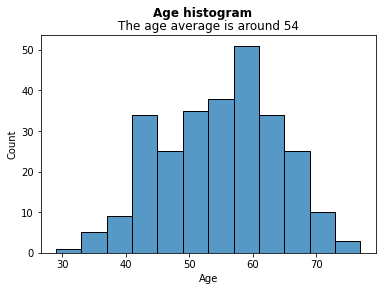

In [ ]:
plt.suptitle('Age histogram', fontweight='heavy')
plt.title('The age average is around 54')
sns.histplot(data=df, x='Age')
plt.show()

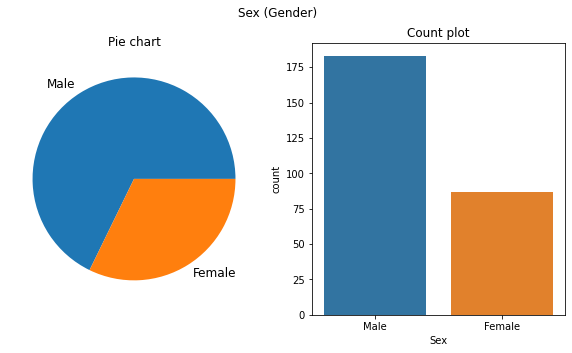

1    183
0     87
Name: Sex, dtype: int64
It can be noticed that predictor (Gender) is imbalance


In [ ]:

labels = ['Male', 'Female']
order = df['Sex'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Sex (Gender)")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Sex'].value_counts(), labels=labels, textprops={'fontsize':12})

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Sex', data=df, order=order)
plt.xticks([0, 1], labels)

plt.show()
print(df['Sex'].value_counts())
print("It can be noticed that predictor (Gender) is imbalance")


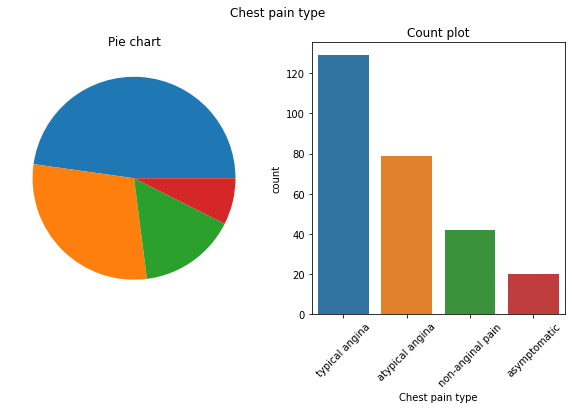

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [ ]:
labels = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
order = df['Chest pain type'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Chest pain type")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Chest pain type'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Chest pain type', data=df, order=order)
plt.xticks([0,1,2,3], labels, rotation=45)
plt.show()

df['Chest pain type'].value_counts()


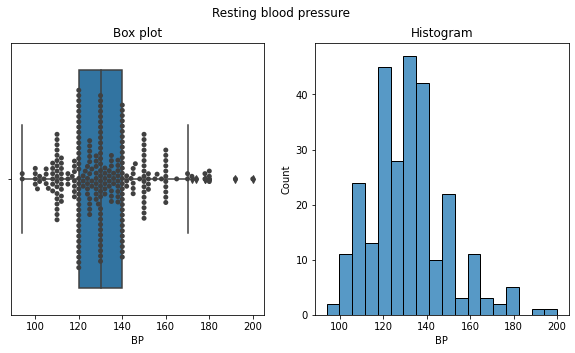

The average resting heart rate: 131.34 It can be observed that histogram is skewed to right side


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Resting blood pressure")

plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x="BP", data=df)
sns.swarmplot(x="BP", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='BP', data=df)
plt.show()

print("The average resting heart rate: %2.2f It can be observed that histogram is skewed to right side" % (df["BP"].mean()))

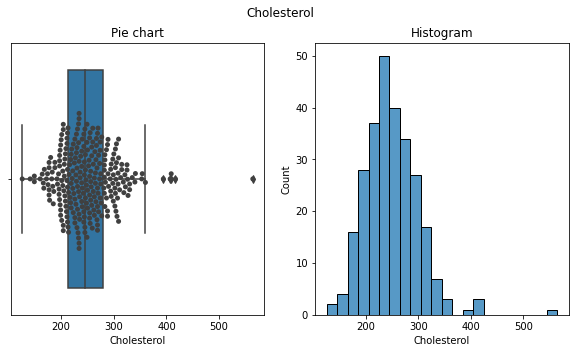

The average resting heart rate: 249.66. The shape of histogram resamble a normal distribution


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Cholesterol")

plt.subplot(1,2,1)
plt.title('Pie chart')
sns.boxplot(x="Cholesterol", data=df)
sns.swarmplot(x="Cholesterol", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='Cholesterol', data=df)
plt.show()

print("The average resting heart rate: %2.2f. The shape of histogram resamble a normal distribution" % (df["Cholesterol"].mean()))

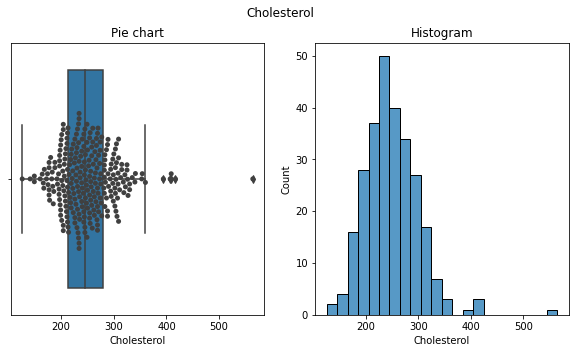

The average resting heart rate: 249.66. The shape of histogram resamble a normal distribution


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Cholesterol")

plt.subplot(1,2,1)
plt.title('Pie chart')
sns.boxplot(x="Cholesterol", data=df)
sns.swarmplot(x="Cholesterol", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='Cholesterol', data=df)
plt.show()

print("The average resting heart rate: %2.2f. The shape of histogram resamble a normal distribution" % (df["Cholesterol"].mean()))

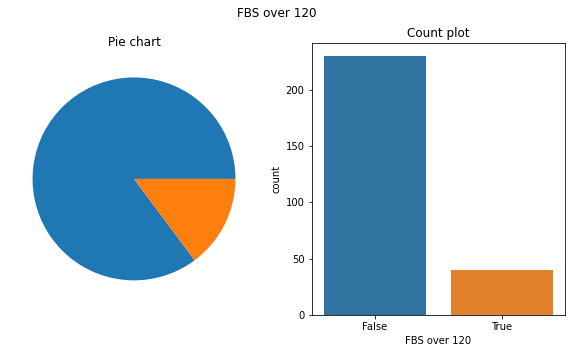

0    230
1     40
Name: FBS over 120, dtype: int64

In [ ]:
labels = ["False", 'True']
order = df['FBS over 120'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("FBS over 120")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['FBS over 120'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='FBS over 120', data=df, order=order)
plt.xticks([0,1], labels=labels)

plt.show()
df['FBS over 120'].value_counts()

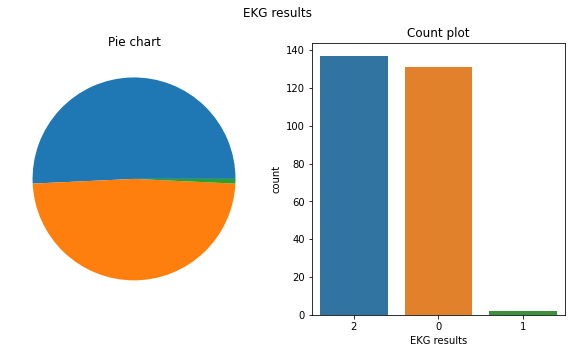

2    137
0    131
1      2
Name: EKG results, dtype: int64

In [ ]:
labels = ["normal", 'aving ST-T wave abnormality', "showing probable or definite left ventricular hypertrophy by Estes' criteria"]
order = df['EKG results'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("EKG results")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['EKG results'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='EKG results', data=df, order=order)
#plt.xticks([0,1,2], labels=labels, rotation=45)

plt.show()
df['EKG results'].value_counts()

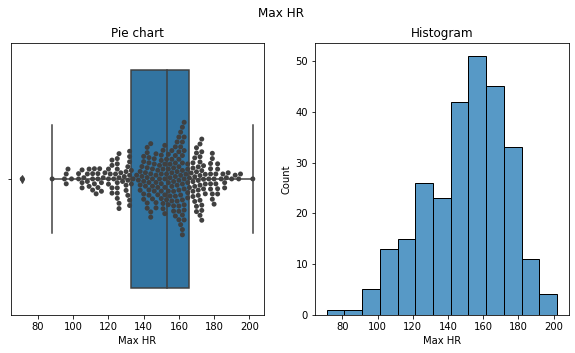

The max heart rate: 149.68 The histogram is slightly left skewed


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Max HR")

plt.subplot(1,2,1)
plt.title('Pie chart')
sns.boxplot(x="Max HR", data=df)
sns.swarmplot(x="Max HR", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='Max HR', data=df)
plt.show()

print("The max heart rate: %2.2f The histogram is slightly left skewed" % (df["Max HR"].mean()))

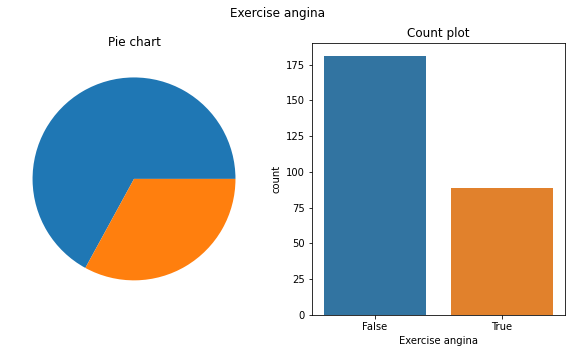

0    181
1     89
Name: Exercise angina, dtype: int64

In [ ]:
labels = ["False", 'True']
order = df['Exercise angina'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Exercise angina")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Exercise angina'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Exercise angina', data=df, order=order)
plt.xticks([0,1], labels=labels)
plt.show()

df['Exercise angina'].value_counts()


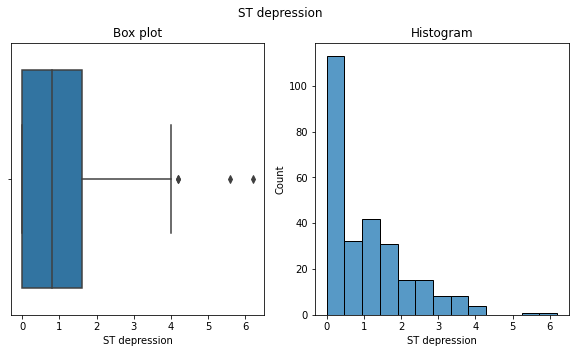

The ST depression average: 1.05 The histogram is left skewed


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("ST depression")

plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x="ST depression", data=df)

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='ST depression', data=df)
plt.show()

print("The ST depression average: %2.2f The histogram is left skewed" % (df["ST depression"].mean()))


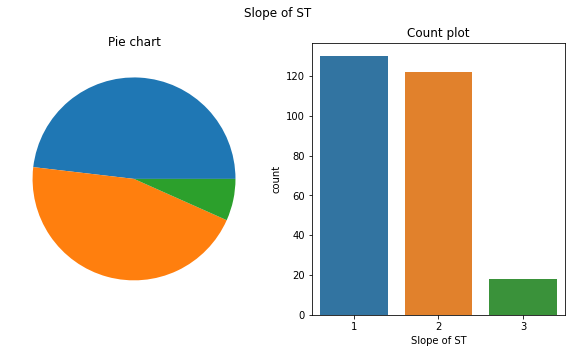

1    130
2    122
3     18
Name: Slope of ST, dtype: int64

In [ ]:
labels = ["1", '2', '3']
order = df['Slope of ST'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Slope of ST")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Slope of ST'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Slope of ST', data=df, order=order)
plt.xticks([0,1,2], labels=labels)

plt.show()
df['Slope of ST'].value_counts()

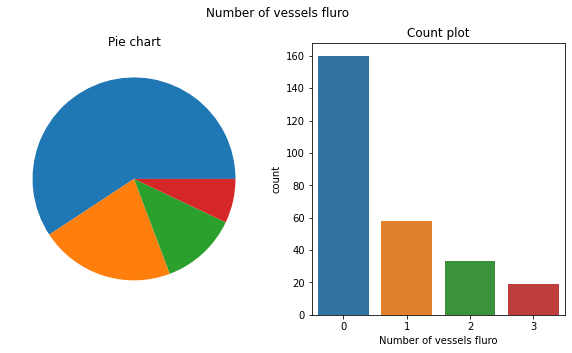

0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

In [ ]:
labels = ["0", '1', '2', "3"]
order = df['Number of vessels fluro'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Number of vessels fluro")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Number of vessels fluro'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Number of vessels fluro', data=df, order=order)
plt.xticks([0,1,2,3], labels=labels)

plt.show()

df['Number of vessels fluro'].value_counts()

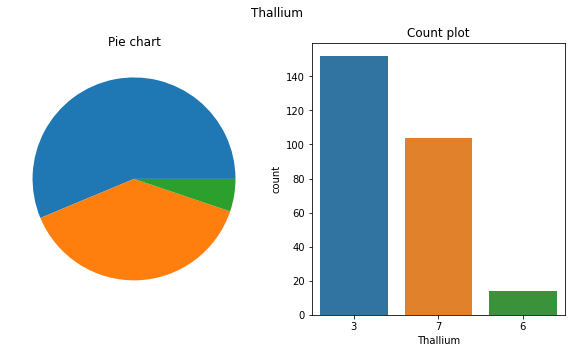

3    152
7    104
6     14
Name: Thallium, dtype: int64

In [ ]:
labels = ["3", '7', '6']
order = df['Thallium'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Thallium")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Thallium'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Thallium', data=df, order=order)
plt.xticks([0,1,2], labels=labels)

plt.show()
df['Thallium'].value_counts()

In [ ]:
#EDA
target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

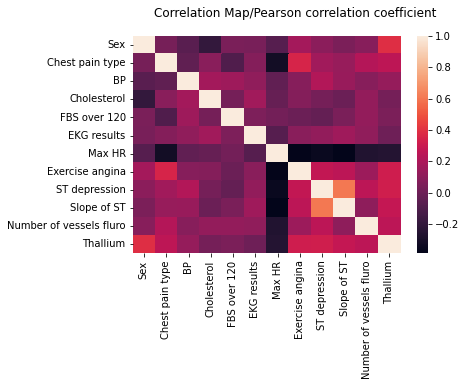

In [ ]:
#CORRELATION MATRIX
plt.suptitle("Correlation Map/Pearson correlation coefficient")
sns.heatmap(df.iloc[:,1:-1].corr())

plt.show()

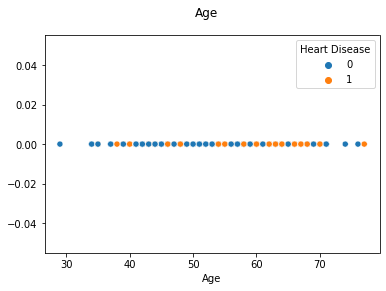

In [ ]:
#Heart disease based on age
plt.suptitle("Age")
sns.scatterplot(data=df, x='Age', y=np.zeros(len(df['Age'])), hue=target)
plt.show()

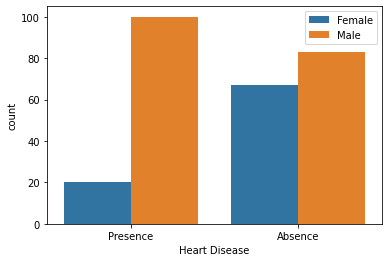

In [ ]:
#Heart disease based on Gender
ax = sns.countplot(x='Heart Disease', hue='Sex', data=df)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Female','Male'], bbox_to_anchor=(1,1))
plt.show()


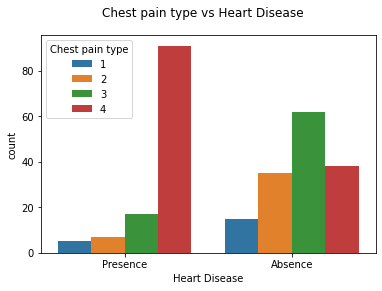

In [ ]:
#Heart disease based on Chest pain type
plt.suptitle('Chest pain type vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Chest pain type')
plt.show()

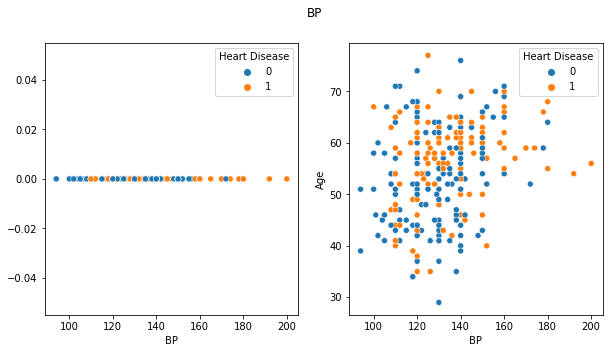

In [ ]:
#Heart Disease based on BP
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.suptitle("BP")
sns.scatterplot(data=df, x='BP', y=np.zeros(len(df['BP'])), hue=target)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='BP', y='Age', hue=target)


plt.show()


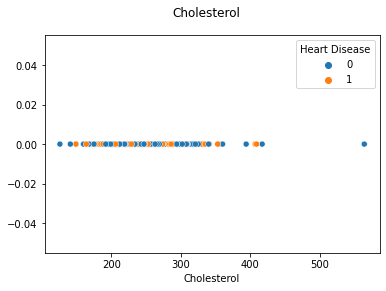

In [ ]:
#Cholesterol
plt.suptitle("Cholesterol")
sns.scatterplot(data=df, x='Cholesterol', y=np.zeros(len(df['Cholesterol'])), hue=target)
plt.show()

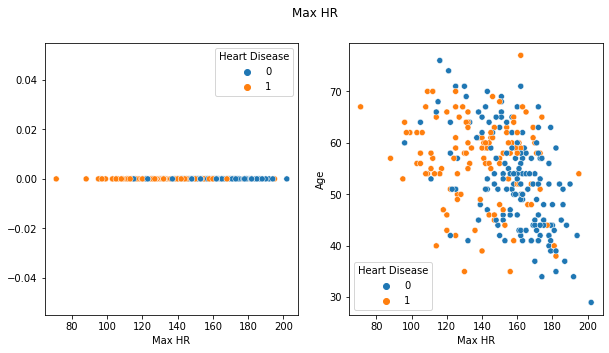

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.suptitle("Max HR")
sns.scatterplot(data=df, x='Max HR', y=np.zeros(len(df['Max HR'])), hue=target)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Max HR', y='Age', hue=target)

plt.show()


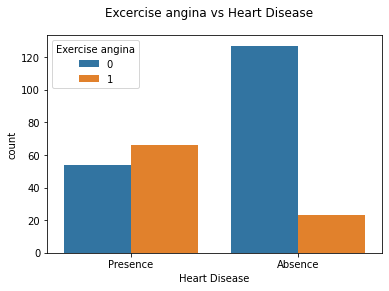

In [ ]:
plt.suptitle('Excercise angina vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Exercise angina')
plt.show()

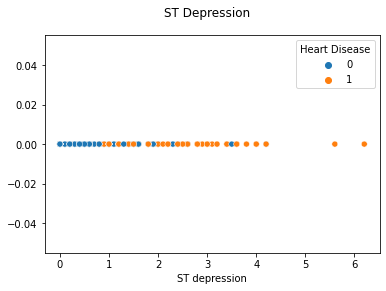

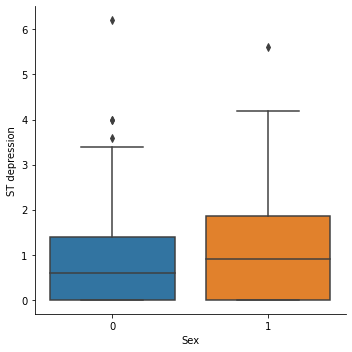

In [ ]:
plt.suptitle("ST Depression")
sns.scatterplot(data=df, x='ST depression', y=np.zeros(len(df['ST depression'])), hue=target)


ax = sns.catplot(x='Sex', y='ST depression', kind='box',  data = df)
plt.show()

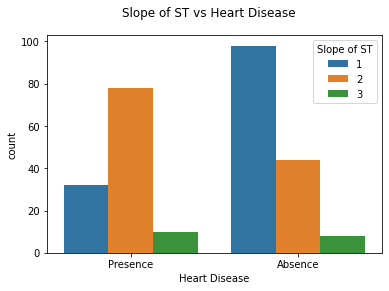

In [ ]:
plt.suptitle('Slope of ST vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Slope of ST')
plt.show()


In [ ]:
# It converts categorical data into dummy or indicator variables
# The drop_first parameter specifies whether or not you want to drop the first category of the categorical variable you're encoding.
Chest_pain_type = pd.get_dummies(df['Chest pain type'], prefix='Chest pain type', drop_first=True)
EKG_results = pd.get_dummies(df['EKG results'], prefix='EKG results', drop_first=True)
Number_of_vessels_fluro = pd.get_dummies(df['Number of vessels fluro'], prefix='Number of vessels fluro', drop_first=True)
Thallium = pd.get_dummies(df['Thallium'], prefix='Thallium', drop_first=True)

frames = [df, Chest_pain_type, EKG_results, Number_of_vessels_fluro, Thallium]
df = pd.concat(frames, axis=1)

df.drop(columns = ['Chest pain type', 'EKG results', 'Number of vessels fluro', 'Thallium', 'Slope of ST'])

target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [ ]:
one_target = int(np.sum(target))
zero_counter = 0
indices_to_remove = []

for i in range(target.shape[0]):
  if target[i] == 0:
    zero_counter += 1
    if zero_counter > one_target:
      indices_to_remove.append(i)

print("Indices before balancing data:", target.shape[0])
print("Idices to delete:", len(indices_to_remove))

Indices before balancing data: 270
Idices to delete: 30


In [ ]:
balanced_inputs = inputs.drop(indices_to_remove, axis=0)
balanced_targets = target.drop(indices_to_remove, axis=0)

#reset indices
reset_inputs = balanced_inputs.reset_index(drop=True)
reset_targets = balanced_targets.reset_index(drop=True)

print("Inputs after balancing data:", reset_inputs.shape[0])
print("Targets after balancing data:", reset_targets.shape[0])

balanced_inputs.head()

Inputs after balancing data: 240
Targets after balancing data: 240


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_1,EKG results_2,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_6,Thallium_7
0,70,1,4,130,322,0,2,109,0,2.4,...,0,0,1,0,1,0,0,1,0,0
1,67,0,3,115,564,0,2,160,0,1.6,...,0,1,0,0,1,0,0,0,0,1
2,57,1,2,124,261,0,0,141,0,0.3,...,1,0,0,0,0,0,0,0,0,1
3,64,1,4,128,263,0,0,105,1,0.2,...,0,0,1,0,0,1,0,0,0,1
4,74,0,2,120,269,0,2,121,1,0.2,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaled_inputs = MinMaxScaler().fit_transform(balanced_inputs)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, balanced_targets, test_size=0.2)

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, predicted))
r2 = r2_score(y_test, predicted)

print('Root mean squared error: ', RMSE)
print("r2: ", r2)

Root mean squared error:  0.3900617888130798
r2:  0.38174700051480515


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

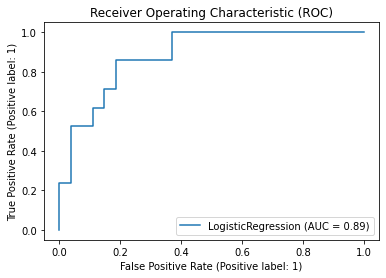

Logistic Regression score:  0.7916666666666666


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve

logit = LogisticRegression()
logit.fit(X_train, y_train)

predicted_logit = logit.predict(X_test)

LogisticRegressionScore = accuracy_score(predicted_logit, y_test)


plt.figure()
metrics.plot_roc_curve(logit, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC)")
plt.show()

print("Logistic Regression score: ", LogisticRegressionScore)

In [ ]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


KNC = KNeighborsClassifier(n_neighbors=2)
KNC.fit(X_train, y_train)

KNC_pred = KNC.predict(X_test)

KNC_accuracy = metrics.accuracy_score(y_test, KNC_pred)

print("KNeighbourClassifier score: ", KNC_accuracy)

KNeighbourClassifier score:  0.8125


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

rnd_clf_pred = rnd_clf.predict(X_test)

rnd_clf_accuracy = metrics.accuracy_score(y_test, rnd_clf_pred)
print("RandomForest score: ", rnd_clf_accuracy)

RandomForest score:  0.7916666666666666


In [ ]:
#Bagging Decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, oob_score=True,
    max_samples=100, bootstrap = True, n_jobs=-1)

bag_clf.fit(X_train, y_train)

bag_clf_oob = bag_clf.oob_score_

bag_clf_pred = bag_clf.predict(X_test)
bag_clf_accuracy = metrics.accuracy_score(y_test, bag_clf_pred)
print("Bagging Decision Tree score: ", bag_clf_accuracy, "Out of the bag: ", bag_clf_oob)

Bagging Decision Tree score:  0.7291666666666666 Out of the bag:  0.7864583333333334
